#Unsupervised Machine Learning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# import the model
from sklearn.cluster import KMeans

In [ ]:
# Spotify_10songs.csv
url = "https://drive.google.com/file/d/1jj7BcsiaAboRxvAhK8mW1ovNCQUYS9hp/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
spotify_songs = pd.read_csv(path)

In [ ]:
songs_10 = spotify_songs.copy()

### Exploring the data set

In [ ]:
songs_10

song_name                                                                 \
0  My Band                                       ...                         
1  The Real Slim Shady                           ...                         
2  Águas De Março                                ...                         
3  The Girl From Ipanema                         ...                         
4  Paint It, Black                               ...                         
5  Sultans Of Swing                              ...                         
6  Space Raiders - Charlotte de Witte Remix      ...                         
7  In Silence                                    ...                         
8  Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...                         
9  Nocturne en mi bémol majeur opus 9 n°2: Ballad...                         

   artist                 danceability   energy    key   loudness   mode   \
0  D12                            0.851   0.84900     1     -3.383      0   
1  Eminem                         0.949   0.66100     5     -4.244      0   
2  Antônio Carlos Jobim           0.642   0.33900     3    -15.503      1   
3  Stan Getz                      0.641   0.14000     8    -16.790      1   
4  The Rolling Stones             0.464   0.79500     1     -9.267      1   
5  Dire Straits                   0.733   0.79400     5    -10.023      1   
6  Eats Everything                0.749   0.73100     4    -10.865      1   
7  Amelie Lens                    0.736   0.84500     1    -12.017      1   
8  Johannes Brahms                0.184   0.00833     3    -33.503      1   
9  Frédéric Chopin                0.387   0.04510     3    -24.698      1   

   speechiness   acousticness   instrumentalness   liveness   valence   \
0        0.0828        0.49700           0.000002     0.1160    0.8440   
1        0.0572        0.03020           0.000000     0.0454    0.7600   
2        0.1400        0.85400           0.000000     0.1050    0.4910   
3        0.0390        0.86700           0.001660     0.1050    0.3880   
4        0.0926        0.04930           0.002440     0.3990    0.6120   
5        0.0307        0.06140           0.036700     0.3300    0.9310   
6        0.1080        0.00314           0.867000     0.1110    0.0598   
7        0.0377        0.00548           0.901000     0.1110    0.1980   
8        0.0519        0.98900           0.596000     0.1040    0.2110   
9        0.0364        0.99000           0.913000     0.1120    0.0710   

   tempo     duration_ms   time_signature   id                       \
0   120.014        298773                4  4XHQyvbrBsQaaBUW1VvmsL    
1   104.504        284200                4  3yfqSUWxFvZELEM4PmlwIR    
2   143.418        212400                4  1y7OxO5i6sfrHXAmUM77YG    
3   129.318        317987                4  3898C4AbdbptwYet6547e5    
4   158.691        202267                4  63T7DJ1AFDD6Bn8VzG6JE8    
5   148.174        348624                4  6cr6UDpkjEaMQ80OjWqEBQ    
6   131.997        438720                4  4F8OK7mNa51mKqgHqWQiYm    
7   128.009        393740                4  2vfSCFvMbpf4hwxt22Wx7b    
8    61.541        109800                3  59cPOVxrn3Yjwydl1pullI    
9    61.494        268427                4  7n92QzQomRCLlciO14X0kd    

                                                html  
0  https://open.spotify.com/track/4XHQyvbrBsQaaBU...  
1  https://open.spotify.com/track/3yfqSUWxFvZELEM...  
2  https://open.spotify.com/track/1y7OxO5i6sfrHXA...  
3  https://open.spotify.com/track/3898C4AbdbptwYe...  
4  https://open.spotify.com/track/63T7DJ1AFDD6Bn8...  
5  https://open.spotify.com/track/6cr6UDpkjEaMQ80...  
6  https://open.spotify.com/track/4F8OK7mNa51mKqg...  
7  https://open.spotify.com/track/2vfSCFvMbpf4hwx...  
8  https://open.spotify.com/track/59cPOVxrn3Yjwyd...  
9  https://open.spotify.com/track/7n92QzQomRCLlci...

In [ ]:
songs_10.describe()

danceability    energy         key   loudness       mode   \
count      10.000000  10.000000  10.000000  10.000000  10.000000   
mean        0.633600   0.520743   3.400000 -14.029300   0.800000   
std         0.229072   0.348562   2.221111   9.217901   0.421637   
min         0.184000   0.008330   1.000000 -33.503000   0.000000   
25%         0.508250   0.189750   1.500000 -16.468250   1.000000   
50%         0.687500   0.696000   3.000000 -11.441000   1.000000   
75%         0.745750   0.794750   4.750000  -9.456000   1.000000   
max         0.949000   0.849000   8.000000  -3.383000   1.000000   

       speechiness   acousticness   instrumentalness   liveness    valence   \
count     10.000000      10.000000          10.000000  10.000000  10.000000   
mean       0.067630       0.434652           0.331780   0.153840   0.456580   
std        0.036715       0.447731           0.428544   0.114019   0.321551   
min        0.030700       0.003140           0.000000   0.045400   0.059800   
25%        0.038025       0.034975           0.000417   0.105000   0.201250   
50%        0.054550       0.279200           0.019570   0.111000   0.439500   
75%        0.090150       0.863750           0.799250   0.115000   0.723000   
max        0.140000       0.990000           0.913000   0.399000   0.931000   

         tempo      duration_ms   time_signature   
count   10.000000      10.000000        10.000000  
mean   118.716000  287493.800000         3.900000  
std     33.661904   96496.252263         0.316228  
min     61.494000  109800.000000         3.000000  
25%    108.381500  226406.750000         4.000000  
50%    128.663500  291486.500000         4.000000  
75%    140.562750  340964.750000         4.000000  
max    158.691000  438720.000000         4.000000

In [ ]:
songs_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   song_name                                                                 10 non-null     object 
 1   artist                                                                    10 non-null     object 
 2   danceability                                                              10 non-null     float64
 3   energy                                                                    10 non-null     float64
 4   key                                                                       10 non-null     int64  
 5   loudness                                                                  10 non-null     float64
 6   mode                                                                 

In [ ]:
# The columns' names have spaces in them
songs_10.columns

Index(['song_name                                                               ',
       'artist               ', 'danceability ', 'energy  ', 'key ',
       'loudness ', 'mode ', 'speechiness ', 'acousticness ',
       'instrumentalness ', 'liveness ', 'valence ', 'tempo   ',
       'duration_ms ', 'time_signature ', 'id                     ', 'html'],
      dtype='object')

In [ ]:
# remove spaces in the columns' names in the whole data frame
songs_10.columns = songs_10.columns.str.replace(' ', '')

In [ ]:
songs_10.columns

Index(['song_name', 'artist', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'id', 'html'],
      dtype='object')

**Explore top 3 Danceability**

In [ ]:
top_3_dance_mask = songs_10['danceability'].nlargest(3).index
songs_10.iloc[top_3_dance_mask, :3]

song_name                 artist  \
1  The Real Slim Shady                           ...  Eminem                  
0  My Band                                       ...  D12                     
6  Space Raiders - Charlotte de Witte Remix      ...  Eats Everything         

   danceability  
1         0.949  
0         0.851  
6         0.749

**Explore Liveness scores**

In [ ]:
songs_10.loc[:, ['song_name', 'artist', 'liveness']].sort_values('liveness', ascending = False)

song_name                 artist  \
4  Paint It, Black                               ...  The Rolling Stones      
5  Sultans Of Swing                              ...  Dire Straits            
0  My Band                                       ...  D12                     
9  Nocturne en mi bémol majeur opus 9 n°2: Ballad...  Frédéric Chopin         
6  Space Raiders - Charlotte de Witte Remix      ...  Eats Everything         
7  In Silence                                    ...  Amelie Lens             
2  Águas De Março                                ...  Antônio Carlos Jobim    
3  The Girl From Ipanema                         ...  Stan Getz               
8  Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...  Johannes Brahms         
1  The Real Slim Shady                           ...  Eminem                  

   liveness  
4    0.3990  
5    0.3300  
0    0.1160  
9    0.1120  
6    0.1110  
7    0.1110  
2    0.1050  
3    0.1050  
8    0.1040  
1    0.0454

In [ ]:
# Valence scores
songs_10.loc[:, ['song_name', 'artist', 'valence', 'tempo', 'danceability']].sort_values('valence', ascending = False)

song_name                 artist  \
5  Sultans Of Swing                              ...  Dire Straits            
0  My Band                                       ...  D12                     
1  The Real Slim Shady                           ...  Eminem                  
4  Paint It, Black                               ...  The Rolling Stones      
2  Águas De Março                                ...  Antônio Carlos Jobim    
3  The Girl From Ipanema                         ...  Stan Getz               
8  Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...  Johannes Brahms         
7  In Silence                                    ...  Amelie Lens             
9  Nocturne en mi bémol majeur opus 9 n°2: Ballad...  Frédéric Chopin         
6  Space Raiders - Charlotte de Witte Remix      ...  Eats Everything         

   valence    tempo  danceability  
5   0.9310  148.174         0.733  
0   0.8440  120.014         0.851  
1   0.7600  104.504         0.949  
4   0.6120  158.691         0.464  
2   0.4910  143.418         0.642  
3   0.3880  129.318         0.641  
8   0.2110   61.541         0.184  
7   0.1980  128.009         0.736  
9   0.0710   61.494         0.387  
6   0.0598  131.997         0.749

### Clustering in 2 Dimentsions

**Danceability vs Energy**

In [ ]:
# Danceability vs Energy
dance_energy_df = songs_10.loc[:, ['song_name', 'danceability', 'energy']].set_index('song_name').copy()
dance_energy_df

danceability   energy
song_name                                                                
My Band                                        ...         0.851  0.84900
The Real Slim Shady                            ...         0.949  0.66100
Águas De Março                                 ...         0.642  0.33900
The Girl From Ipanema                          ...         0.641  0.14000
Paint It, Black                                ...         0.464  0.79500
Sultans Of Swing                               ...         0.733  0.79400
Space Raiders - Charlotte de Witte Remix       ...         0.749  0.73100
In Silence                                     ...         0.736  0.84500
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...         0.184  0.00833
Nocturne en mi bémol majeur opus 9 n°2: Ballade...         0.387  0.04510

Calculate the KMeans to label the clusters

In [ ]:
# initialise the model
random_seed = 112

dance_energy_kmeans = KMeans(n_clusters = 4, # we'll explore how to choose the number of clusters in a later notebook
                      random_state = random_seed)

# fit the model to the data
dance_energy_kmeans.fit(dance_energy_df)

KMeans(n_clusters=4, random_state=112)

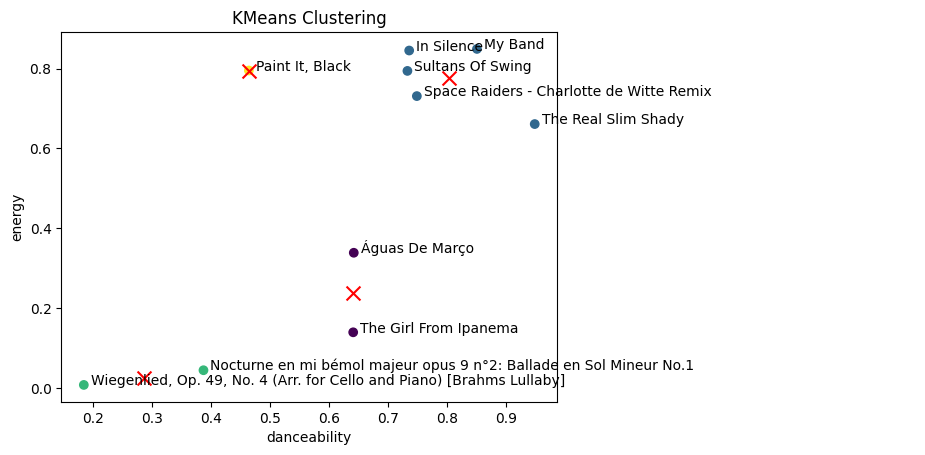

In [ ]:
# @title Visualisation of data points and clusters

# Plot the data points
plt.scatter(x = dance_energy_df.iloc[:, 0],
            y = dance_energy_df.iloc[:, 1],
            c = dance_energy_kmeans.labels_,
            cmap = 'viridis')

# Annotate the data points
for idx, row in dance_energy_df.iterrows():
    plt.annotate(idx, (row["danceability"], row["energy"]), xytext=(5, 0), textcoords='offset points')

# Add labels and title
plt.title('KMeans Clustering')
plt.xlabel(dance_energy_df.columns[0])
plt.ylabel(dance_energy_df.columns[1])

# Plot the cluster centers
plt.scatter(x = dance_energy_kmeans.cluster_centers_[:, 0],
            y = dance_energy_kmeans.cluster_centers_[:, 1],
            c = 'red',
            marker = 'x',
            s = 100)

# Display the plot
plt.show()

Create a function to run Two-Dimension features clustering

In [ ]:
def two_features_clustering (feature_1, feature_2, num_cluster):

  # Create two_features dataframe
  two_features_df = songs_10.loc[:, ['song_name', feature_1, feature_2]].set_index('song_name').copy()
  two_features_df

  # Calculate the KMeans to label the clusters
  # initialise the model
  random_seed = 112

  two_features_kmeans = KMeans(n_clusters = num_cluster, # we'll explore how to choose the number of clusters in a later notebook
                        random_state = random_seed)

  # fit the model to the data
  two_features_kmeans.fit(two_features_df)

  #Visualize the clustering
  # Plot the data points
  plt.scatter(x = two_features_df.iloc[:, 0],
              y = two_features_df.iloc[:, 1],
              c = two_features_kmeans.labels_,
              cmap = 'viridis')

  # Annotate the data points
  for idx, row in two_features_df.iterrows():
      plt.annotate(idx, (row[feature_1], row[feature_2]), xytext=(5, 0), textcoords='offset points')

  # Add labels and title
  plt.title(f'KMeans {num_cluster} Clusters of {feature_1} & {feature_2}')
  plt.xlabel(two_features_df.columns[0])
  plt.ylabel(two_features_df.columns[1])

  # Plot the cluster centers
  plt.scatter(x = two_features_kmeans.cluster_centers_[:, 0],
              y = two_features_kmeans.cluster_centers_[:, 1],
              c = 'red',
              marker = 'x',
              s = 100)

  # Display the plot
  plt.show()

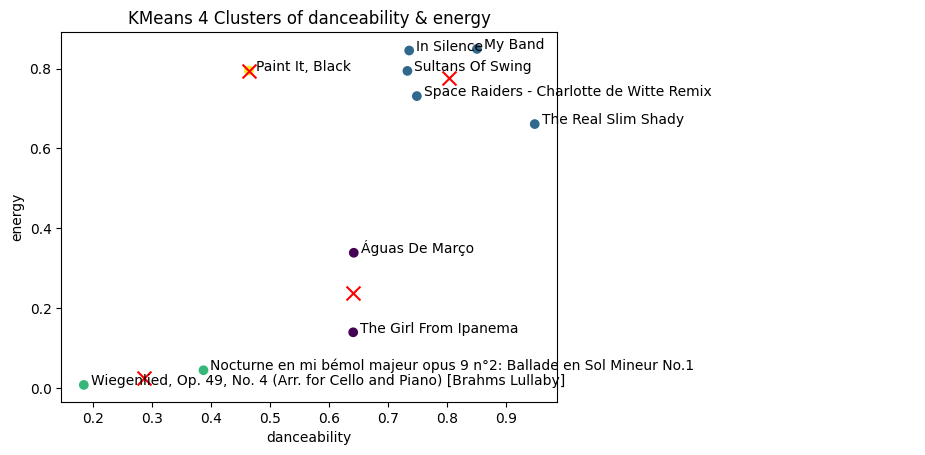

In [ ]:
# Danceability vs Energy
two_features_clustering('danceability', 'energy', 4)

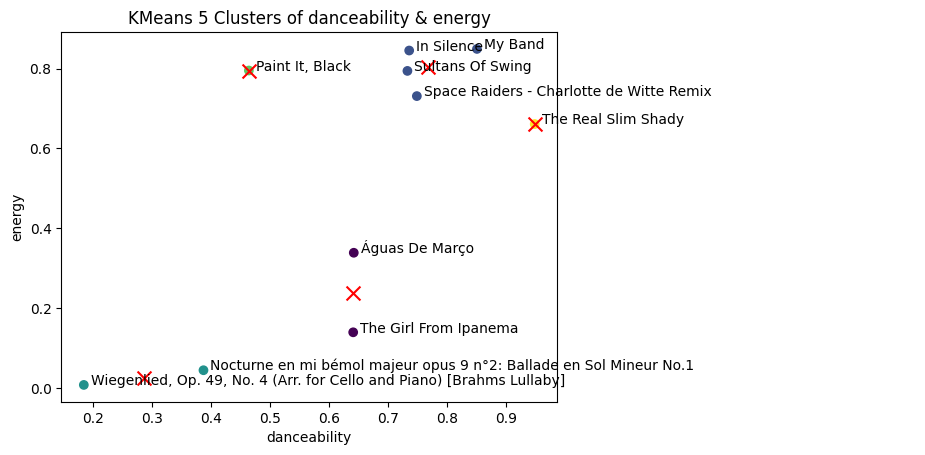

In [ ]:
# Danceability vs Energy
two_features_clustering('danceability', 'energy', 5)

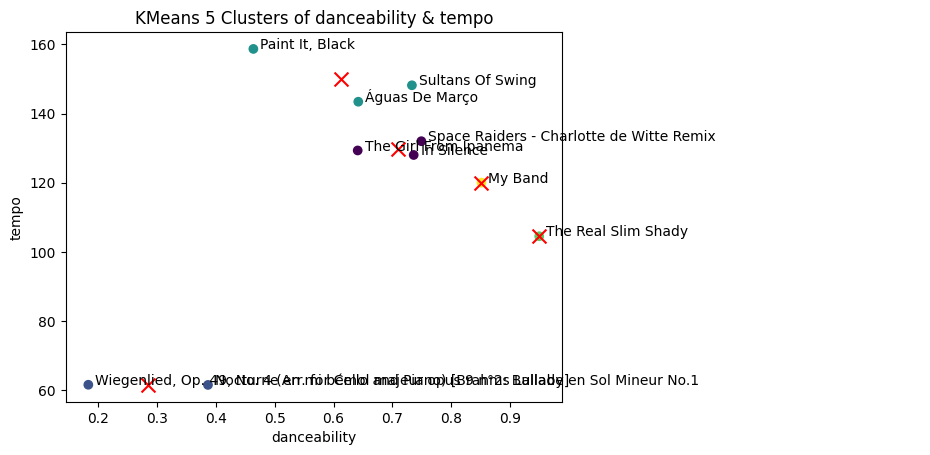

In [ ]:
two_features_clustering('danceability', 'tempo', 5)

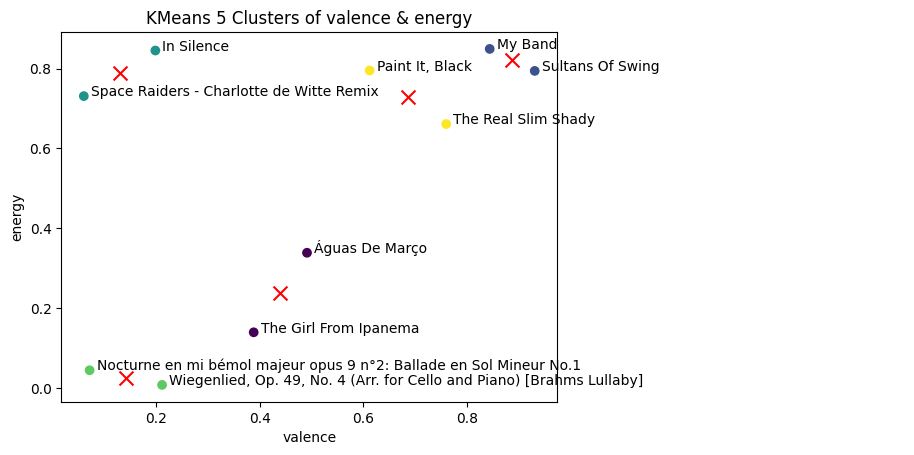

In [ ]:
two_features_clustering('valence', 'energy', 5)

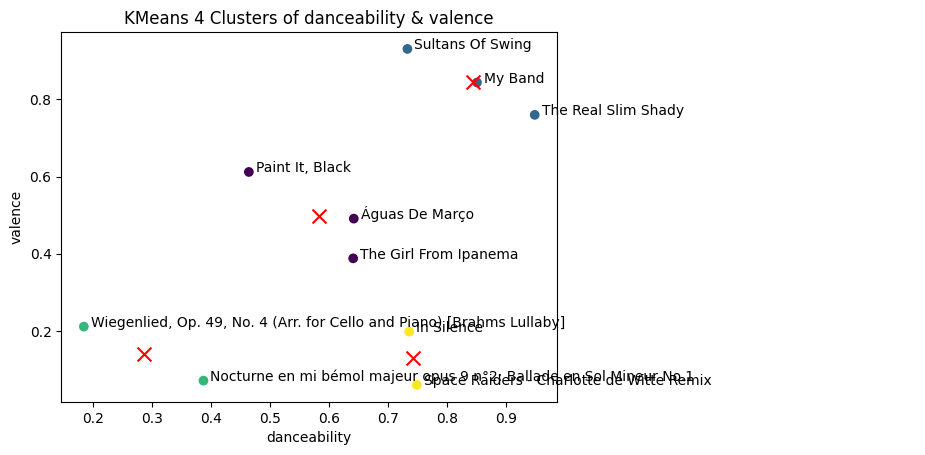

In [ ]:
two_features_clustering('danceability', 'valence', 4)

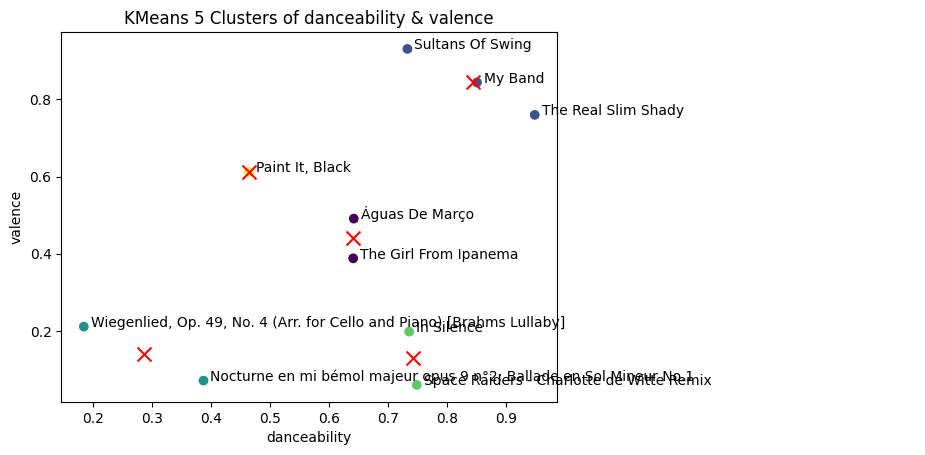

In [ ]:
two_features_clustering('danceability', 'valence', 5)

**Exploring the data using YData Profiling**

In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=36f4dd91cafc20b8a9265e3cc78a66f6d76211794c9c27fd9736ff47964346d6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
songs_report = ProfileReport(songs_10)

In [ ]:
songs_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
songs_report.to_file('songs_report_file.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### KMeans for ALL features

In [ ]:
my_cluster = ['rap', 'rap', 'lounge', 'lounge', 'old_school', 'old_school', 'techno', 'techno', 'classical', 'classical']

In [ ]:
dropped_columns = ['artist', 'id', 'html']
all_features_df = songs_10.drop(columns= dropped_columns).set_index('song_name').copy()

In [ ]:
# initialize the model
all_features_kmeans = KMeans(n_clusters = 5, # we'll explore how to choose the number of clusters in a later notebook
                        random_state = random_seed)

# fit the model to the data
all_features_kmeans.fit(all_features_df)

# obtain the cluster output
all_features_cluster = all_features_kmeans.labels_

# attach the cluster output to our original DataFrame
all_features_df['cluster'] = all_features_cluster

all_features_df[['cluster']].sort_values(by='cluster')

cluster
song_name                                                  
My Band                                        ...        0
The Real Slim Shady                            ...        0
The Girl From Ipanema                          ...        0
Nocturne en mi bémol majeur opus 9 n°2: Ballade...        0
Águas De Março                                 ...        1
Paint It, Black                                ...        1
Sultans Of Swing                               ...        2
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...        3
Space Raiders - Charlotte de Witte Remix       ...        4
In Silence                                     ...        4

**Create a fucntion to drop features for clustering**

In [ ]:
dropped_columns = ['artist', 'id', 'html', 'duration_ms', 'time_signature', 'mode']

In [ ]:
def selected_features (data_features, dropped_columns, num_cluster):
  my_cluster = ['rap', 'rap', 'lounge', 'lounge', 'old_school', 'old_school', 'techno', 'techno', 'classical', 'classical']
  all_features_df = data_features.drop(columns= dropped_columns).set_index('song_name').copy()

  # initialize the model
  random_seed = 112
  all_features_kmeans = KMeans(n_clusters = num_cluster, # we'll explore how to choose the number of clusters in a later notebook
                          random_state = random_seed)

  # fit the model to the data
  all_features_kmeans.fit(all_features_df)

  # obtain the cluster output
  all_features_cluster = all_features_kmeans.labels_

  # attach the cluster output to our original DataFrame
  all_features_df['cluster'] = all_features_cluster
  all_features_df['my_opinion'] = my_cluster
  cluster_table = all_features_df[['cluster', 'my_opinion']].sort_values(by='cluster')

  return cluster_table

In [ ]:
dropped_columns = ['artist', 'id', 'html']
cluster_table = selected_features(songs_10, dropped_columns, 5)
cluster_table

cluster  my_opinion
song_name                                                              
My Band                                        ...        0         rap
The Real Slim Shady                            ...        0         rap
The Girl From Ipanema                          ...        0      lounge
Nocturne en mi bémol majeur opus 9 n°2: Ballade...        0   classical
Águas De Março                                 ...        1      lounge
Paint It, Black                                ...        1  old_school
Sultans Of Swing                               ...        2  old_school
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...        3   classical
Space Raiders - Charlotte de Witte Remix       ...        4      techno
In Silence                                     ...        4      techno

In [ ]:
dropped_columns = ['artist', 'id', 'html', 'duration_ms']
cluster_table = selected_features(songs_10, dropped_columns, 5)
cluster_table

cluster  my_opinion
song_name                                                              
The Girl From Ipanema                          ...        0      lounge
Space Raiders - Charlotte de Witte Remix       ...        0      techno
In Silence                                     ...        0      techno
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...        1   classical
Nocturne en mi bémol majeur opus 9 n°2: Ballade...        1   classical
Águas De Março                                 ...        2      lounge
Paint It, Black                                ...        2  old_school
Sultans Of Swing                               ...        2  old_school
The Real Slim Shady                            ...        3         rap
My Band                                        ...        4         rap

In [ ]:
dropped_columns = ['artist', 'id', 'html', 'duration_ms', 'time_signature']
cluster_table = selected_features(songs_10, dropped_columns, 5)
cluster_table

cluster  my_opinion
song_name                                                              
The Girl From Ipanema                          ...        0      lounge
Space Raiders - Charlotte de Witte Remix       ...        0      techno
In Silence                                     ...        0      techno
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...        1   classical
Nocturne en mi bémol majeur opus 9 n°2: Ballade...        1   classical
Águas De Março                                 ...        2      lounge
Paint It, Black                                ...        2  old_school
Sultans Of Swing                               ...        2  old_school
The Real Slim Shady                            ...        3         rap
My Band                                        ...        4         rap

In [ ]:
dropped_columns = ['artist', 'id', 'html', 'duration_ms', 'loudness', 'tempo']
cluster_table = selected_features(songs_10, dropped_columns, 5)
cluster_table

cluster  my_opinion
song_name                                                              
The Girl From Ipanema                          ...        0      lounge
Águas De Março                                 ...        1      lounge
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P...        1   classical
Nocturne en mi bémol majeur opus 9 n°2: Ballade...        1   classical
Paint It, Black                                ...        2  old_school
In Silence                                     ...        2      techno
The Real Slim Shady                            ...        3         rap
Sultans Of Swing                               ...        3  old_school
Space Raiders - Charlotte de Witte Remix       ...        3      techno
My Band                                        ...        4         rap